In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import RMSD
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Load the topology and trajectory files
u = mda.Universe("myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc")

In [2]:
non_cluster = [1530, 32411, 24534, 18281]

In [3]:
cluster_4 = [12739, 12942, 13092, 13151]

In [4]:
cluster_5 = [18271, 18275, 18267, 18447]

# No Cluster 

Aligning frames: 100%|███████████████████████████| 4/4 [00:00<00:00, 134.92it/s]


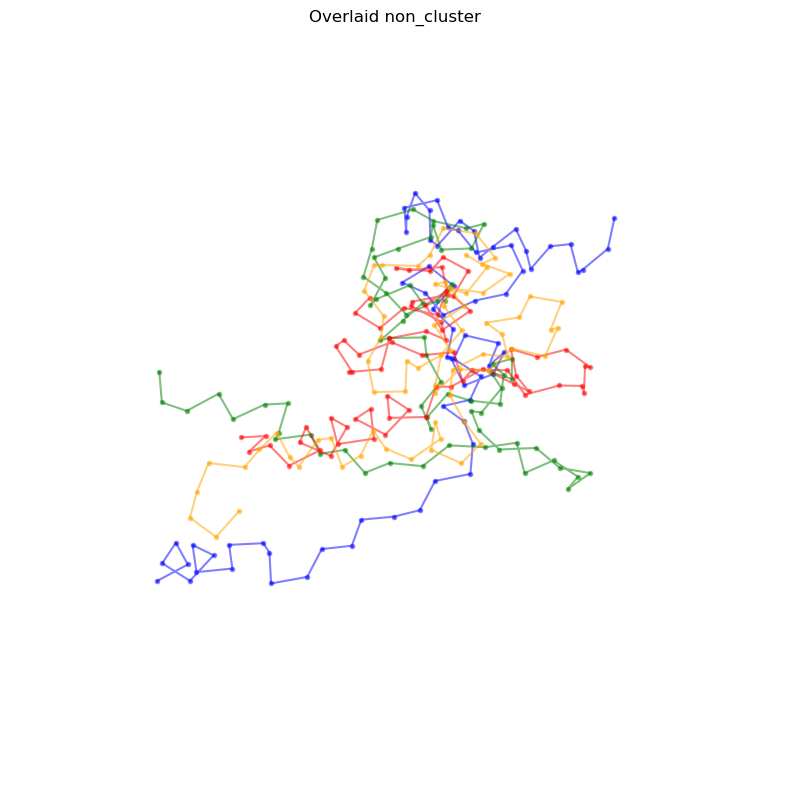

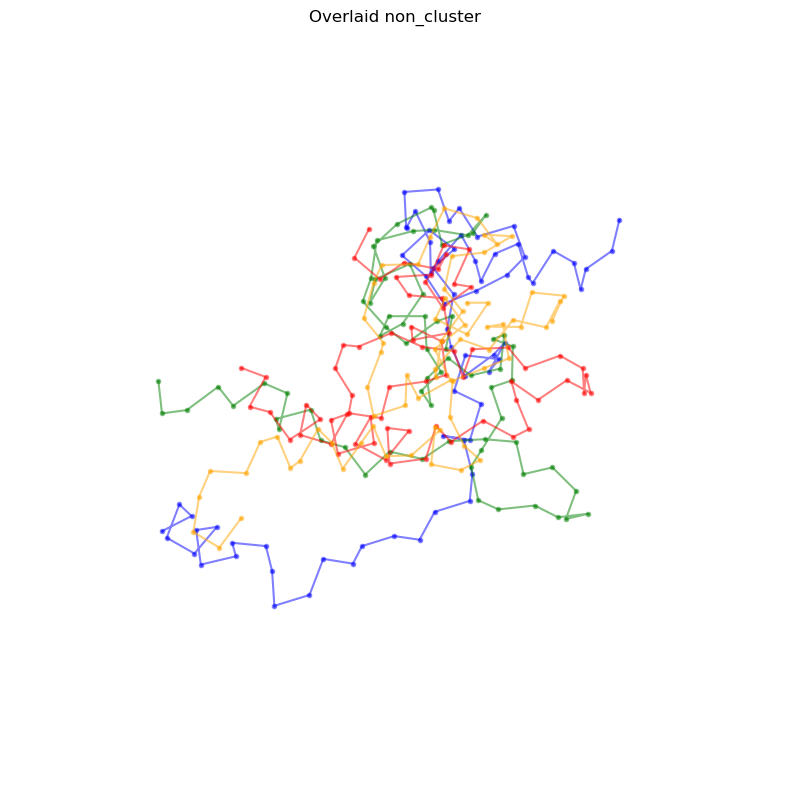

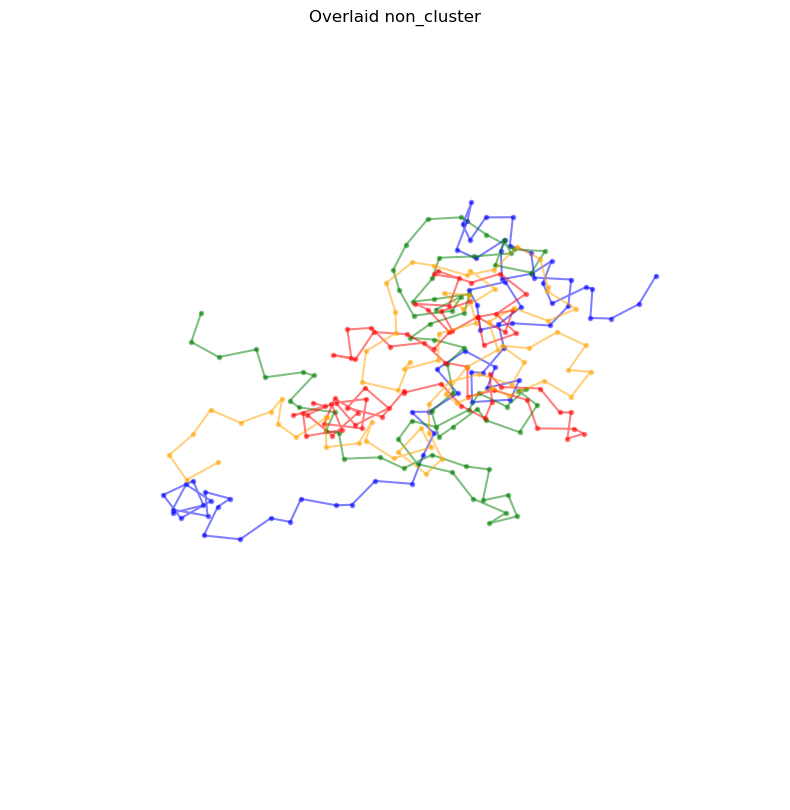

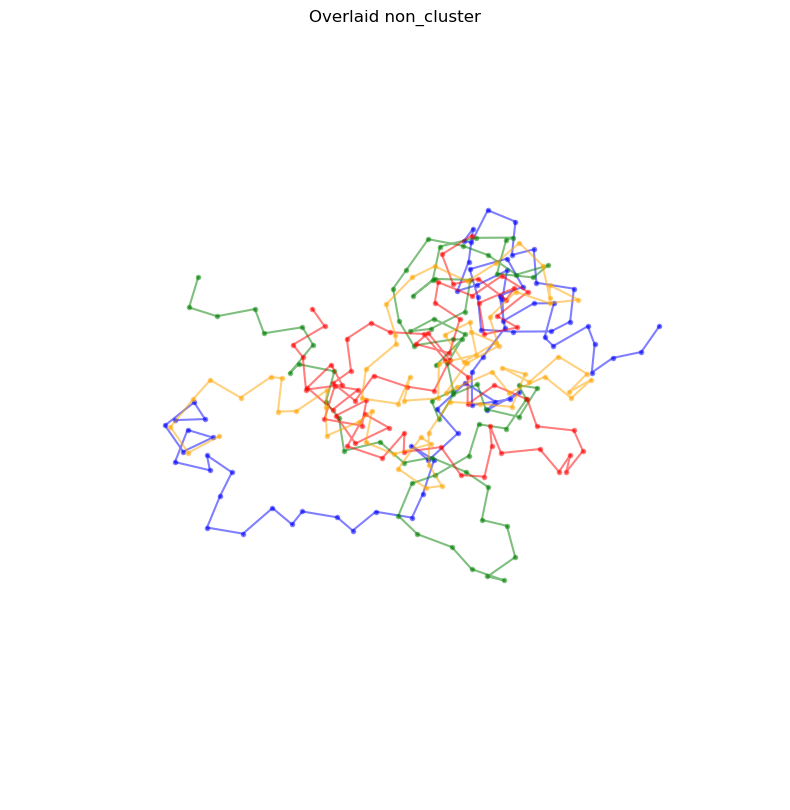

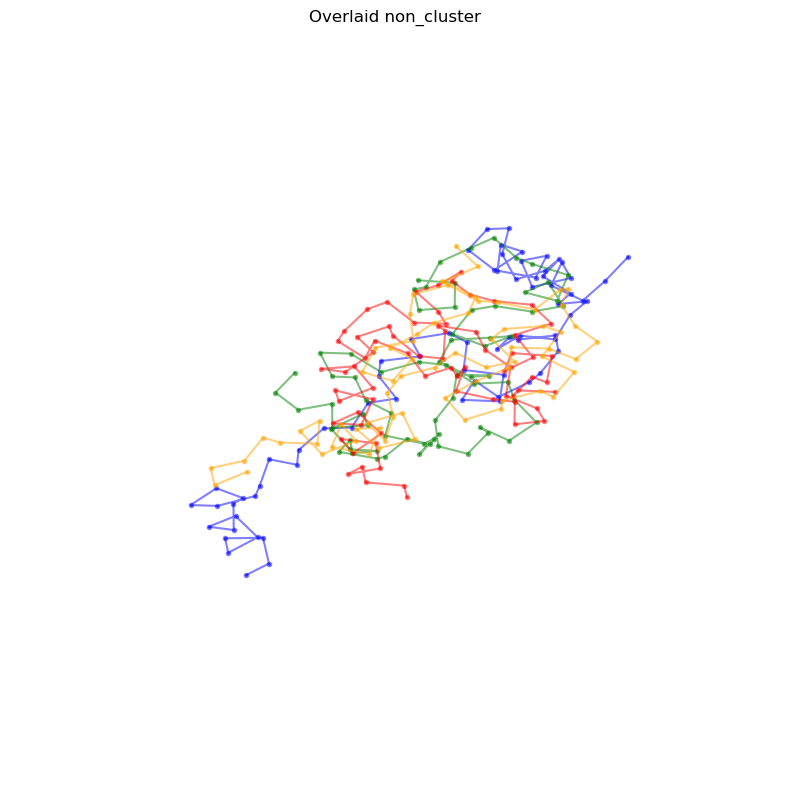

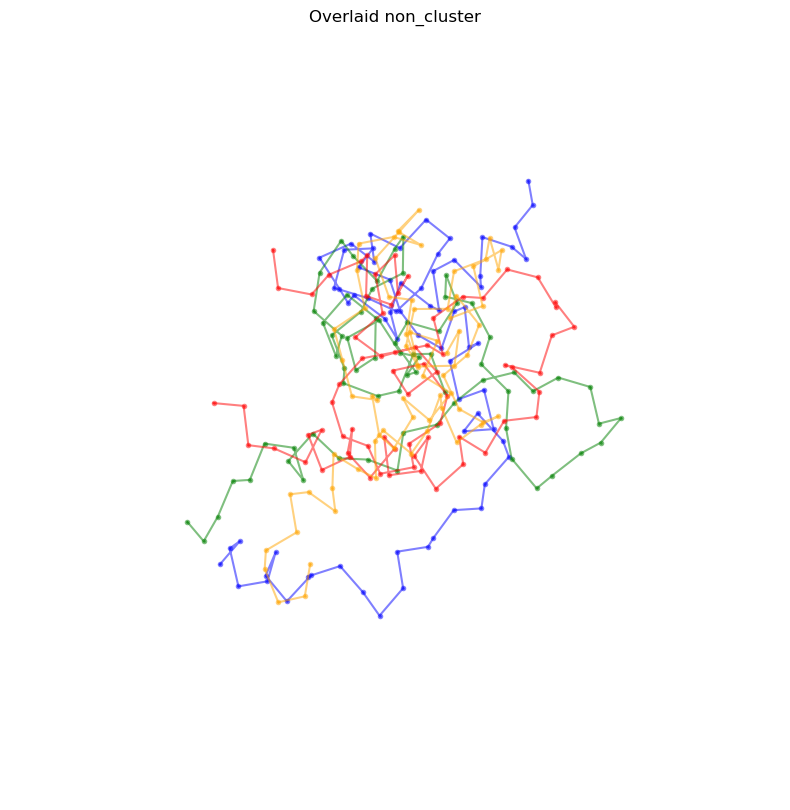

In [5]:
indices = non_cluster
title = 'non_cluster'

def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("name CA").positions.copy())  # Extracting only Calpha atoms
    return frames

# Extract frames for cluster
frames_cluster_s = extract_frames(indices, u)

def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("name CA"))  # Creating a temporary universe with Calpha atoms
    temp_universe.atoms.positions = positions
    return temp_universe

def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

select_all_calpha = "name CA"  # Selecting only Calpha atoms for alignment

def calculate_overlap_counts(frames):
    overlap_counts = []
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        overlap_counts.append((unique, counts_frame))
    return overlap_counts

def calculate_cumulative_overlap(reference_frame, frames):
    cumulative_overlap = 0
    ref_unique, ref_counts = np.unique(reference_frame, axis=0, return_counts=True)
    ref_counts_dict = {tuple(pos): count for pos, count in zip(ref_unique, ref_counts)}
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        for pos, count in zip(unique, counts_frame):
            pos_tuple = tuple(pos)
            if pos_tuple in ref_counts_dict:
                cumulative_overlap += min(ref_counts_dict[pos_tuple], count)
    return cumulative_overlap

best_reference_index = -1
max_cumulative_overlap = -1

for i, frame in enumerate(frames_cluster_s):
    cumulative_overlap = calculate_cumulative_overlap(frame, frames_cluster_s)
    if cumulative_overlap > max_cumulative_overlap:
        max_cumulative_overlap = cumulative_overlap
        best_reference_index = i

reference_universe = create_temp_universe(frames_cluster_s[best_reference_index], u)

aligned_frames_cluster_s = align_frames(reference_universe, frames_cluster_s, select_all_calpha)

angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

def calculate_overlap_counts(aligned_frames):
    counts = []
    for frame in aligned_frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        counts.append((unique, counts_frame))
    return counts

overlap_counts = calculate_overlap_counts(aligned_frames_cluster_s)

cumulative_overlap = {}

for unique, counts_frame in overlap_counts:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap:
            cumulative_overlap[pos_tuple] += count
        else:
            cumulative_overlap[pos_tuple] = count

colors = ['blue', 'green', 'red', 'orange', 'black', 'grey']
assert len(colors) >= len(aligned_frames_cluster_s), "Not enough colors for each frame!"

def plot_aligned_frames(aligned_frames, angles, title):
    for angle in angles:
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot cluster frames with lines
        for i, positions in enumerate(aligned_frames):
            color = colors[i % len(colors)]  # Ensure cyclic usage if more frames than colors
            opacity = 0.5 * np.max([cumulative_overlap[tuple(pos)] for pos in positions]) if positions.size > 0 else 0.01
            ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=2, markeredgewidth=2, alpha=opacity)

        ax.view_init(elev=angle[0], azim=angle[1])
        ax.set_axis_off()  # Remove axes
        ax.grid(False)     # Remove grid lines
        plt.title(f'Overlaid {title}')
        plt.show()

# Define the title based on the indices variable name
plot_aligned_frames(aligned_frames_cluster_s, angles, title)

# Cluster 4

Aligning frames: 100%|████████████████████████████| 4/4 [00:00<00:00, 27.74it/s]


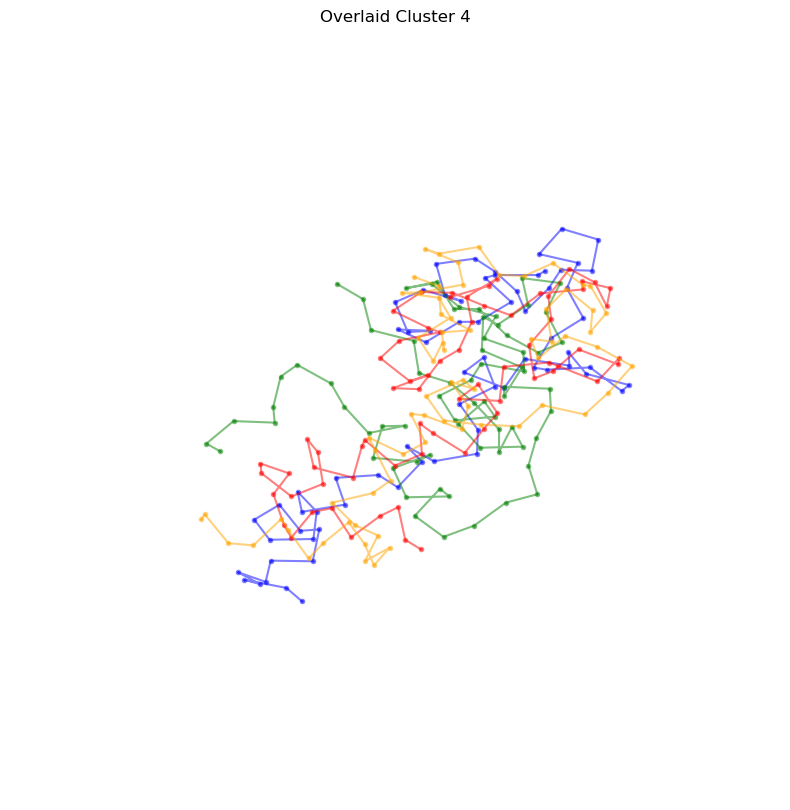

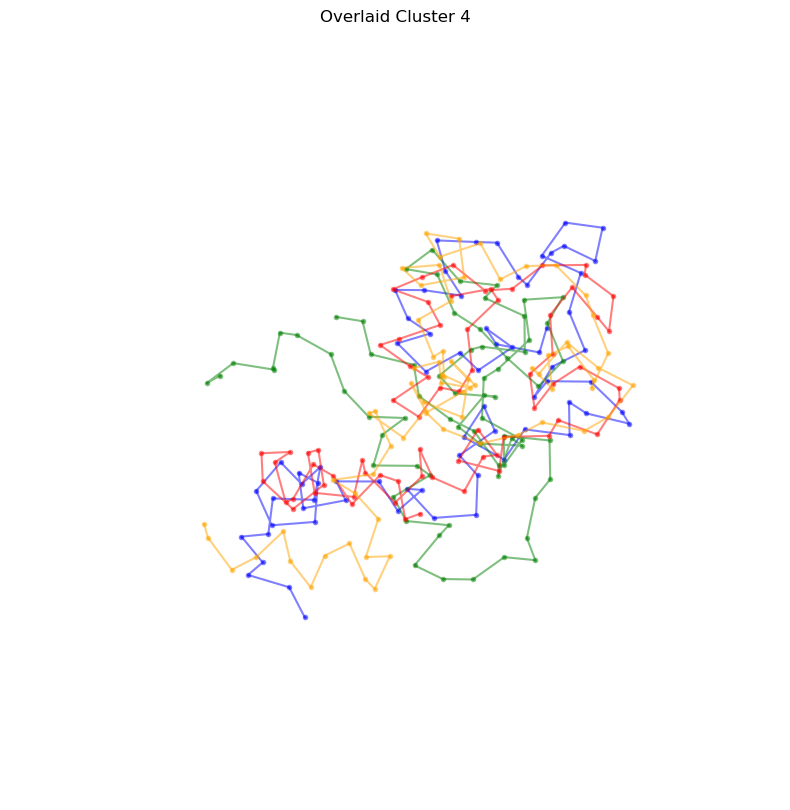

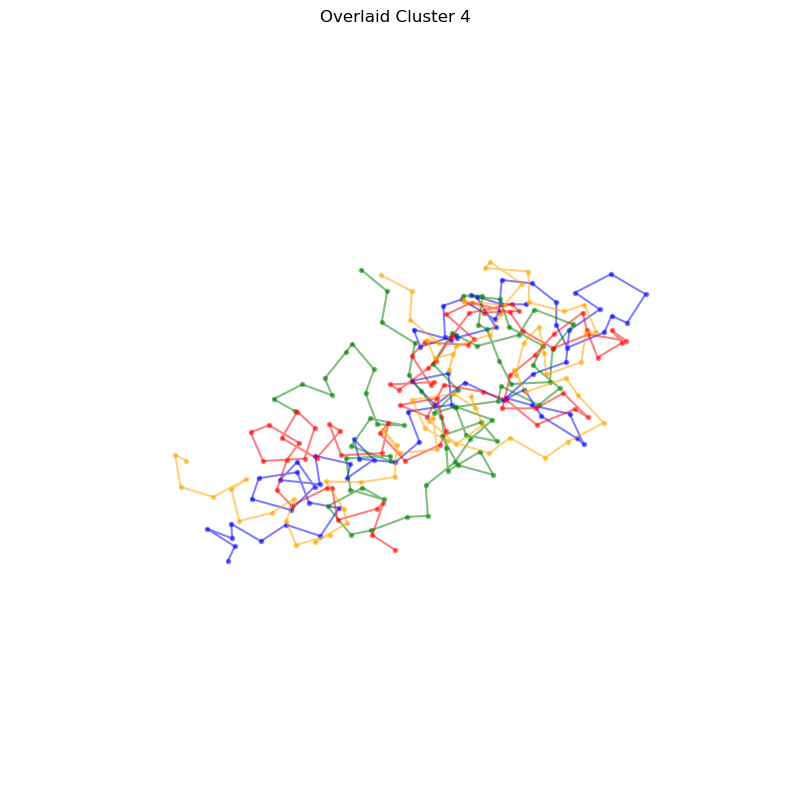

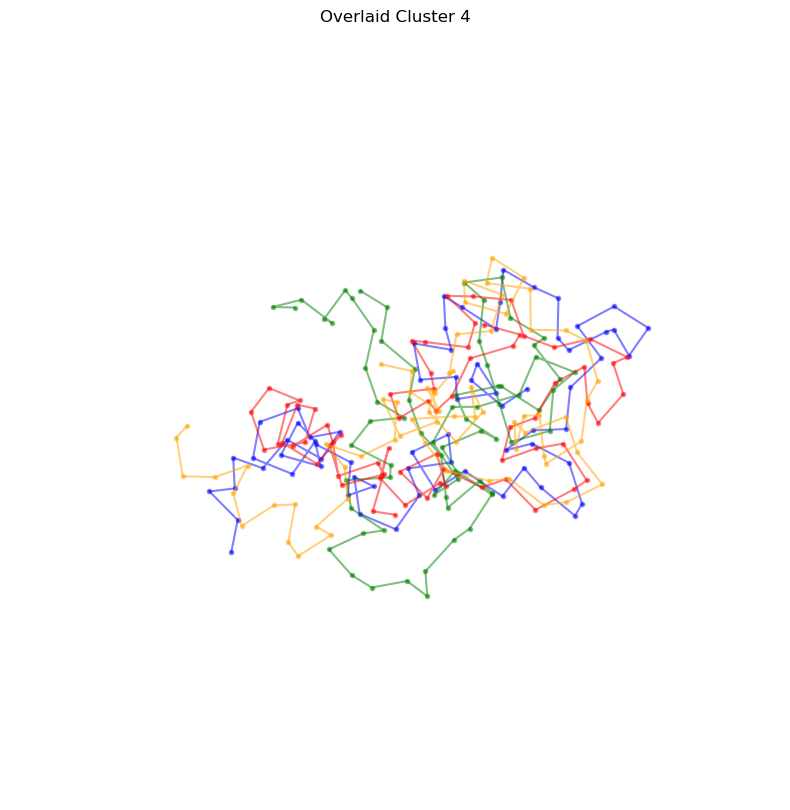

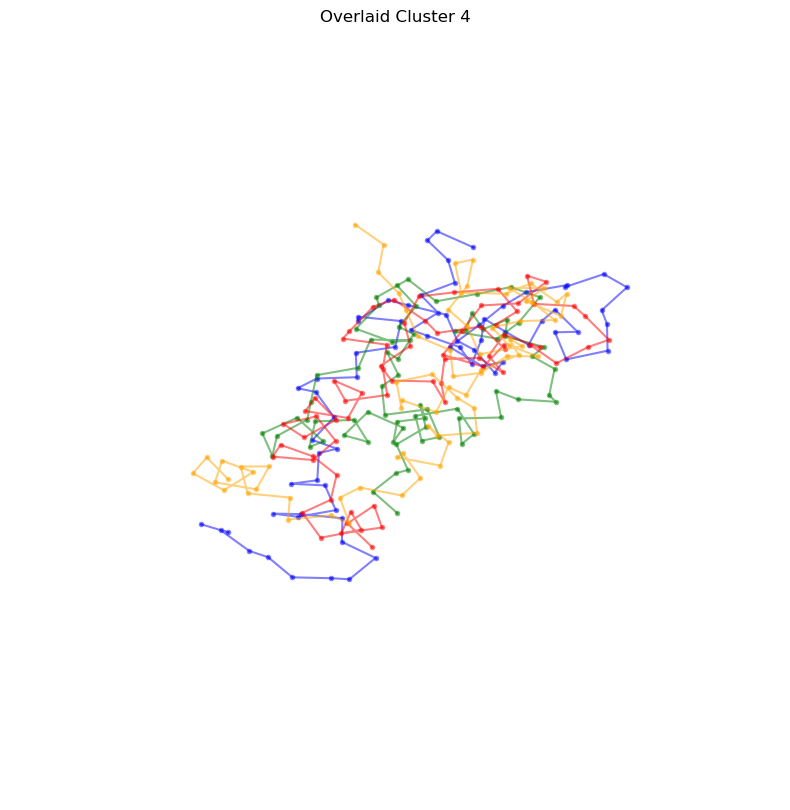

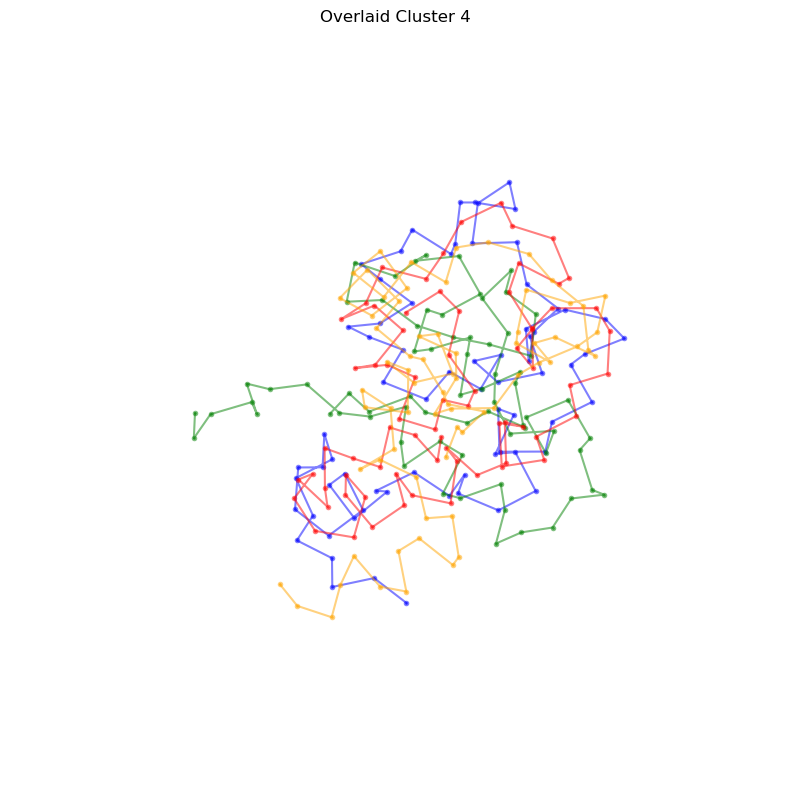

In [6]:
indices = cluster_4
title = 'Cluster 4'

def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("name CA").positions.copy())  # Extracting only Calpha atoms
    return frames

# Extract frames for cluster
frames_cluster_s = extract_frames(indices, u)

def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("name CA"))  # Creating a temporary universe with Calpha atoms
    temp_universe.atoms.positions = positions
    return temp_universe

def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

select_all_calpha = "name CA"  # Selecting only Calpha atoms for alignment

def calculate_overlap_counts(frames):
    overlap_counts = []
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        overlap_counts.append((unique, counts_frame))
    return overlap_counts

def calculate_cumulative_overlap(reference_frame, frames):
    cumulative_overlap = 0
    ref_unique, ref_counts = np.unique(reference_frame, axis=0, return_counts=True)
    ref_counts_dict = {tuple(pos): count for pos, count in zip(ref_unique, ref_counts)}
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        for pos, count in zip(unique, counts_frame):
            pos_tuple = tuple(pos)
            if pos_tuple in ref_counts_dict:
                cumulative_overlap += min(ref_counts_dict[pos_tuple], count)
    return cumulative_overlap

best_reference_index = -1
max_cumulative_overlap = -1

for i, frame in enumerate(frames_cluster_s):
    cumulative_overlap = calculate_cumulative_overlap(frame, frames_cluster_s)
    if cumulative_overlap > max_cumulative_overlap:
        max_cumulative_overlap = cumulative_overlap
        best_reference_index = i

reference_universe = create_temp_universe(frames_cluster_s[best_reference_index], u)

aligned_frames_cluster_s = align_frames(reference_universe, frames_cluster_s, select_all_calpha)

angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

def calculate_overlap_counts(aligned_frames):
    counts = []
    for frame in aligned_frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        counts.append((unique, counts_frame))
    return counts

overlap_counts = calculate_overlap_counts(aligned_frames_cluster_s)

cumulative_overlap = {}

for unique, counts_frame in overlap_counts:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap:
            cumulative_overlap[pos_tuple] += count
        else:
            cumulative_overlap[pos_tuple] = count

colors = ['blue', 'green', 'red', 'orange', 'black', 'grey']
assert len(colors) >= len(aligned_frames_cluster_s), "Not enough colors for each frame!"

def plot_aligned_frames(aligned_frames, angles, title):
    for angle in angles:
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot cluster frames with lines
        for i, positions in enumerate(aligned_frames):
            color = colors[i % len(colors)]  # Ensure cyclic usage if more frames than colors
            opacity = 0.5 * np.max([cumulative_overlap[tuple(pos)] for pos in positions]) if positions.size > 0 else 0.01
            ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=2, markeredgewidth=2, alpha=opacity)

        ax.view_init(elev=angle[0], azim=angle[1])
        ax.set_axis_off()  # Remove axes
        ax.grid(False)     # Remove grid lines
        plt.title(f'Overlaid {title}')
        plt.show()

# Define the title based on the indices variable name
plot_aligned_frames(aligned_frames_cluster_s, angles, title)

# Cluster 5

Aligning frames: 100%|███████████████████████████| 4/4 [00:00<00:00, 145.84it/s]


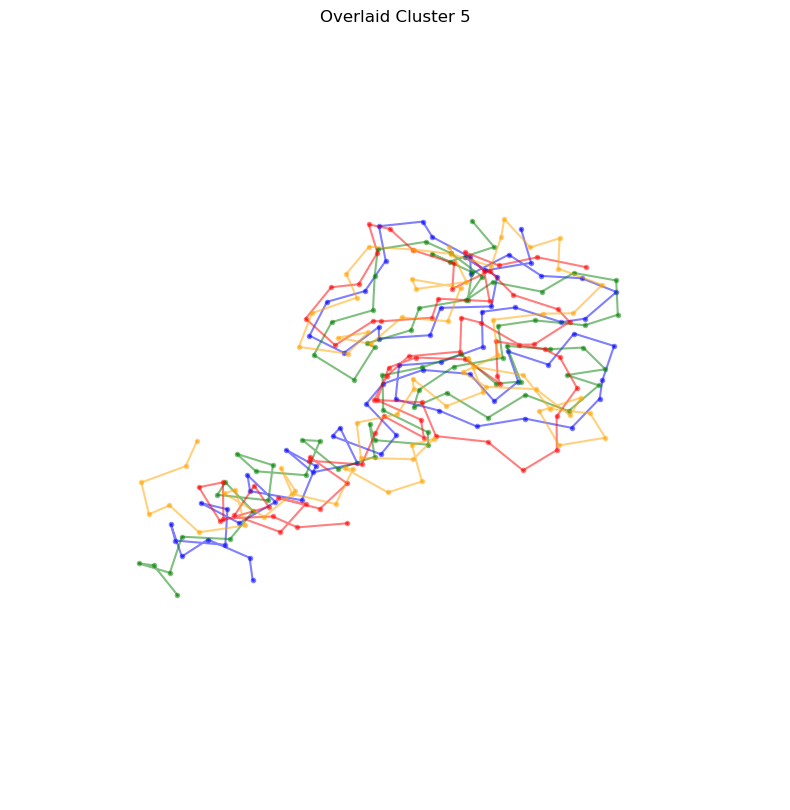

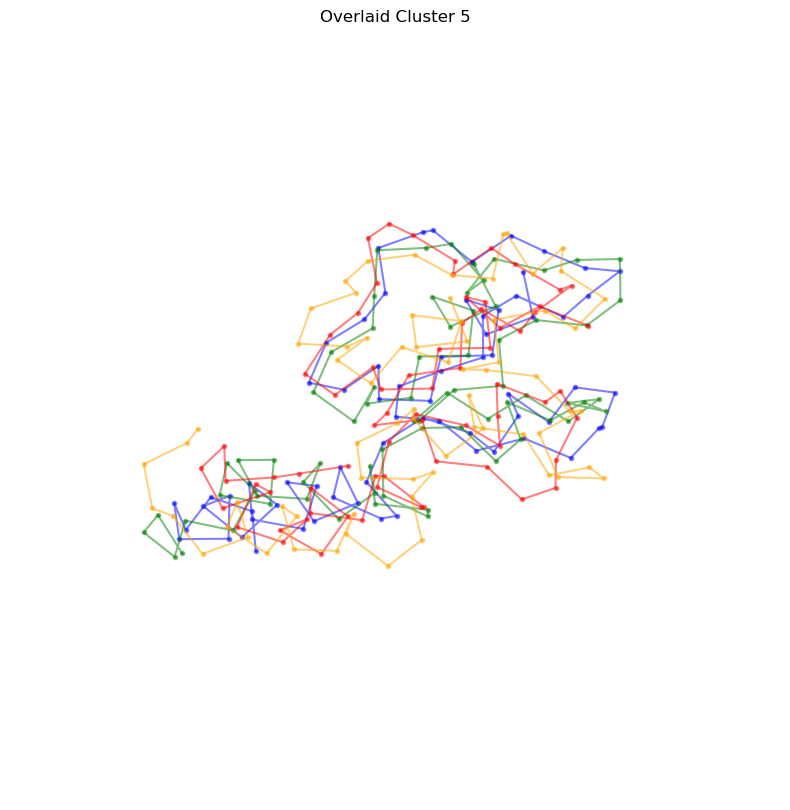

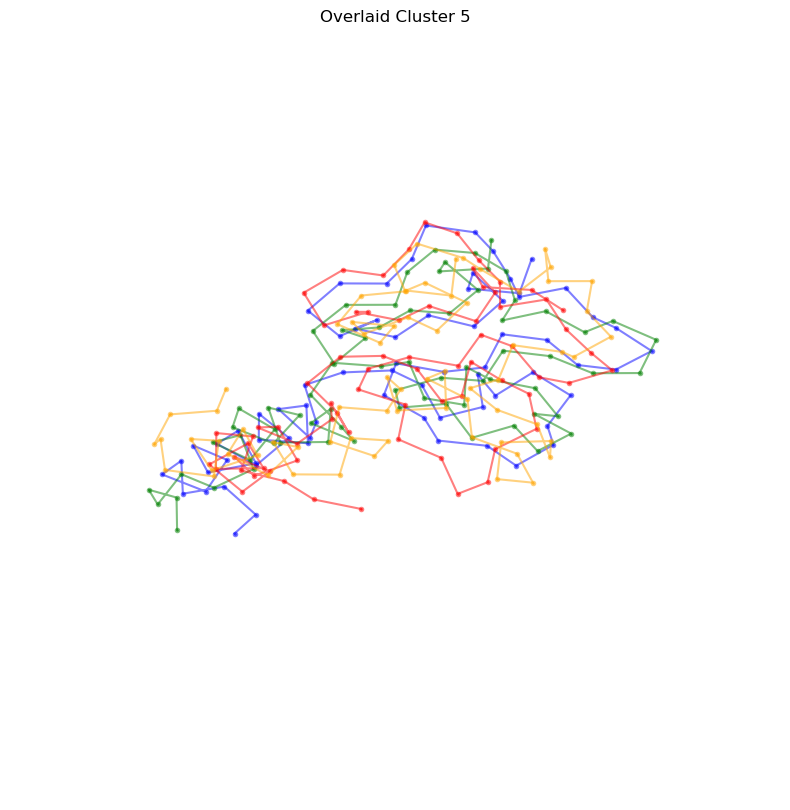

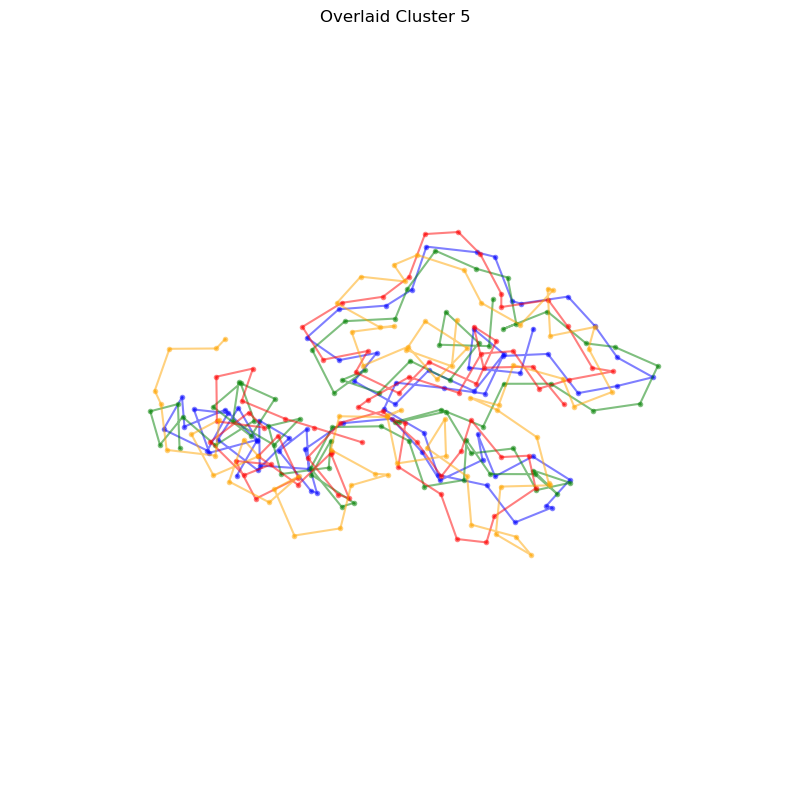

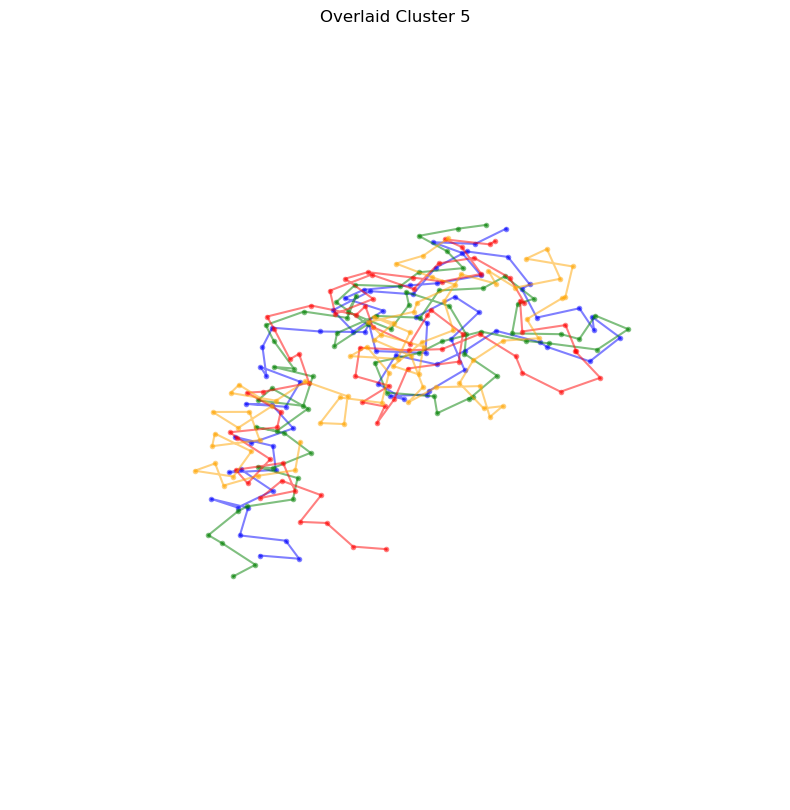

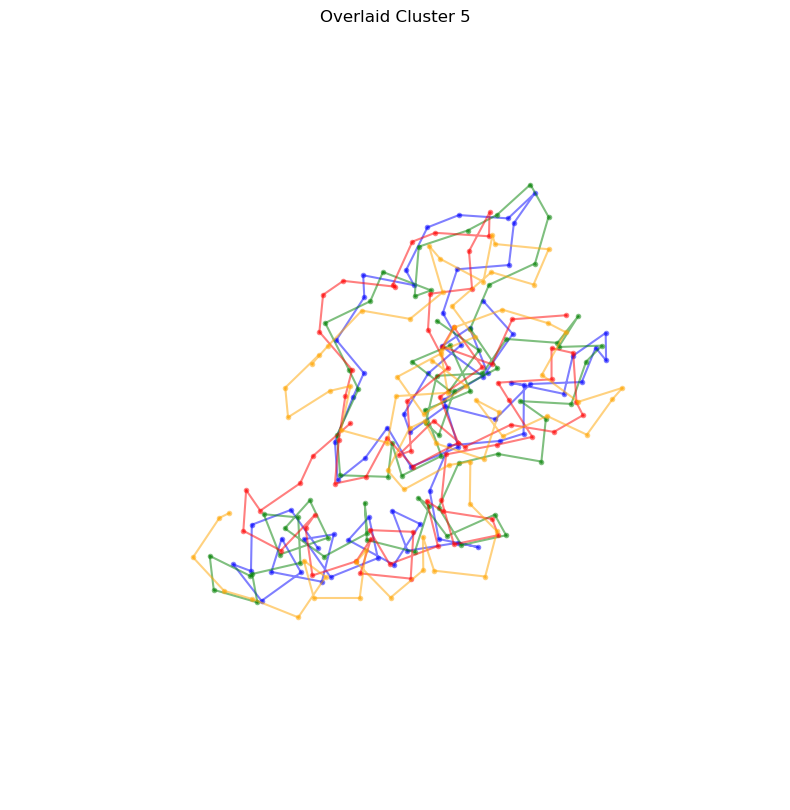

In [7]:
indices = cluster_5
title = 'Cluster 5'

def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("name CA").positions.copy())  # Extracting only Calpha atoms
    return frames

# Extract frames for cluster
frames_cluster_s = extract_frames(indices, u)

def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("name CA"))  # Creating a temporary universe with Calpha atoms
    temp_universe.atoms.positions = positions
    return temp_universe

def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

select_all_calpha = "name CA"  # Selecting only Calpha atoms for alignment

def calculate_overlap_counts(frames):
    overlap_counts = []
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        overlap_counts.append((unique, counts_frame))
    return overlap_counts

def calculate_cumulative_overlap(reference_frame, frames):
    cumulative_overlap = 0
    ref_unique, ref_counts = np.unique(reference_frame, axis=0, return_counts=True)
    ref_counts_dict = {tuple(pos): count for pos, count in zip(ref_unique, ref_counts)}
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        for pos, count in zip(unique, counts_frame):
            pos_tuple = tuple(pos)
            if pos_tuple in ref_counts_dict:
                cumulative_overlap += min(ref_counts_dict[pos_tuple], count)
    return cumulative_overlap

best_reference_index = -1
max_cumulative_overlap = -1

for i, frame in enumerate(frames_cluster_s):
    cumulative_overlap = calculate_cumulative_overlap(frame, frames_cluster_s)
    if cumulative_overlap > max_cumulative_overlap:
        max_cumulative_overlap = cumulative_overlap
        best_reference_index = i

reference_universe = create_temp_universe(frames_cluster_s[best_reference_index], u)

aligned_frames_cluster_s = align_frames(reference_universe, frames_cluster_s, select_all_calpha)

angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

def calculate_overlap_counts(aligned_frames):
    counts = []
    for frame in aligned_frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        counts.append((unique, counts_frame))
    return counts

overlap_counts = calculate_overlap_counts(aligned_frames_cluster_s)

cumulative_overlap = {}

for unique, counts_frame in overlap_counts:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap:
            cumulative_overlap[pos_tuple] += count
        else:
            cumulative_overlap[pos_tuple] = count

colors = ['blue', 'green', 'red', 'orange', 'black', 'grey']
assert len(colors) >= len(aligned_frames_cluster_s), "Not enough colors for each frame!"

def plot_aligned_frames(aligned_frames, angles, title):
    for angle in angles:
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot cluster frames with lines
        for i, positions in enumerate(aligned_frames):
            color = colors[i % len(colors)]  # Ensure cyclic usage if more frames than colors
            opacity = 0.5 * np.max([cumulative_overlap[tuple(pos)] for pos in positions]) if positions.size > 0 else 0.01
            ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=2, markeredgewidth=2, alpha=opacity)

        ax.view_init(elev=angle[0], azim=angle[1])
        ax.set_axis_off()  # Remove axes
        ax.grid(False)     # Remove grid lines
        plt.title(f'Overlaid {title}')
        plt.show()

# Define the title based on the indices variable name
plot_aligned_frames(aligned_frames_cluster_s, angles, title)